# Name: Sanika Vaidya
# Andrew ID: sanikav

### Imports

In [1]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import os

### Unpack data

In [2]:
data = None

def unpack_img(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, nrows, ncols))
        return data

def unpack_label(file_name):
    with gzip.open(file_name, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
        return data    

image_train_data = unpack_img(r"C:\Users\sanik\Downloads\mnist.tar\mnist\train-images-idx3-ubyte.gz")
labels_train_data = unpack_label(r"C:\Users\sanik\Downloads\mnist.tar\mnist\train-labels-idx1-ubyte.gz")
image_test_data = unpack_img(r"C:\Users\sanik\Downloads\mnist.tar\mnist\t10k-images-idx3-ubyte.gz")
labels_test_data = unpack_label(r"C:\Users\sanik\Downloads\mnist.tar\mnist\t10k-labels-idx1-ubyte.gz")


image_train_data = image_train_data.reshape(60000, 784) 
image_test_data = image_test_data.reshape(10000, 784) 

# print(image_train_data.shape)
# print(labels_train_data.shape)
# print(image_test_data.shape)
# print(labels_test_data.shape)

### Vectorize

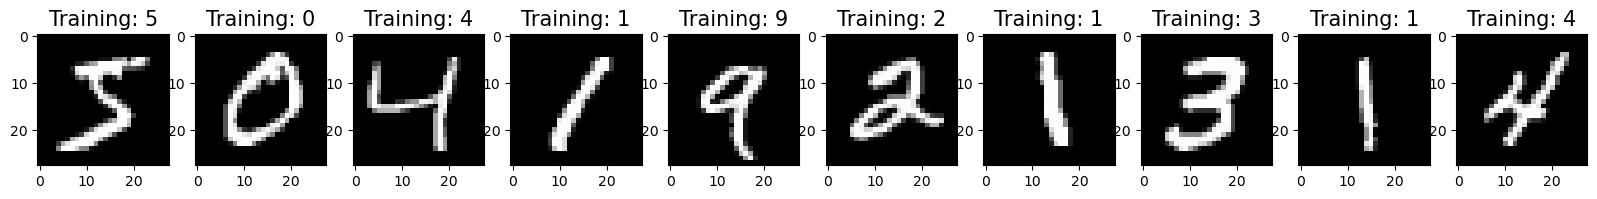

In [3]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(0,10):
    ax = axes[i]
    img = image_train_data[i]
    label = labels_train_data[i]
    ax.imshow(np.reshape(img, (28, 28)), cmap=plt.cm.gray)
    ax.set_title(f'Training: {label}', fontsize=15)

### Logistic Regression

In [4]:
lr=LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')
lr.fit(image_train_data,labels_train_data)
y_pred=lr.predict(image_test_data)

print("Accuracy of Logistic Regression model: "+ str(accuracy_score(labels_test_data, y_pred)*100)+"%")

Accuracy of Logistic Regression model: 92.23%


C:\Users\sanik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


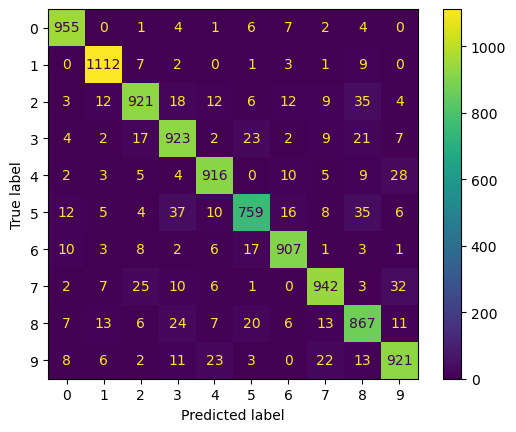

In [5]:
cm = confusion_matrix(labels_test_data, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Naive Bayes

In [6]:
nb=MultinomialNB(alpha=1.0)
nb.fit(image_train_data,labels_train_data)
y_pred=nb.predict(image_test_data)

print("Accuracy of Naive Bayes model: "+ str(accuracy_score(labels_test_data, y_pred)*100)+"%")

Accuracy of Naive Bayes model: 83.65%


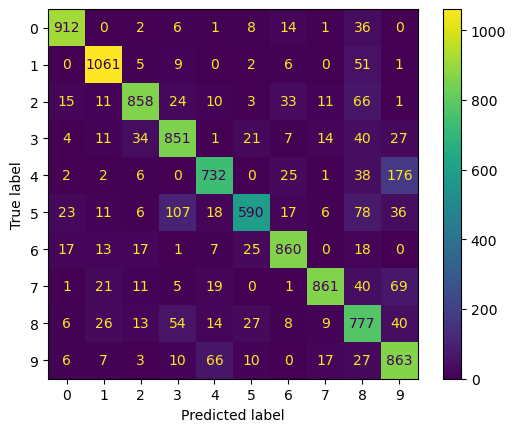

In [7]:
cm = confusion_matrix(labels_test_data, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Write to model files

In [8]:
with open(r'C:\Users\sanik\OneDrive\Desktop\models\nb.model', 'wb') as f:
    pickle.dump(nb, f)

with open(r'C:\Users\sanik\OneDrive\Desktop\models\lr.model', 'wb') as f:
    pickle.dump(lr, f)